# DSE 512 Assignment 4 - Matthew Horan

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [32]:
metrics1 = pd.read_csv('metricsppn1.csv', index_col = 0)
metrics2 = pd.read_csv('metricsppn2.csv', index_col = 0)
metrics4 = pd.read_csv('metricsppn4.csv', index_col = 0)
metrics8 = pd.read_csv('metricsppn8.csv', index_col = 0)

In [33]:
accuracies = [metrics1['Accuracy'], metrics2['Accuracy'], metrics4['Accuracy'], metrics8['Accuracy']]
times = [metrics1['elapsed_time'], metrics2['elapsed_time'], metrics4['elapsed_time'], metrics8['elapsed_time']]
labels = ['1 partition', '2 partitions', '4 parititions', '8 partitions']

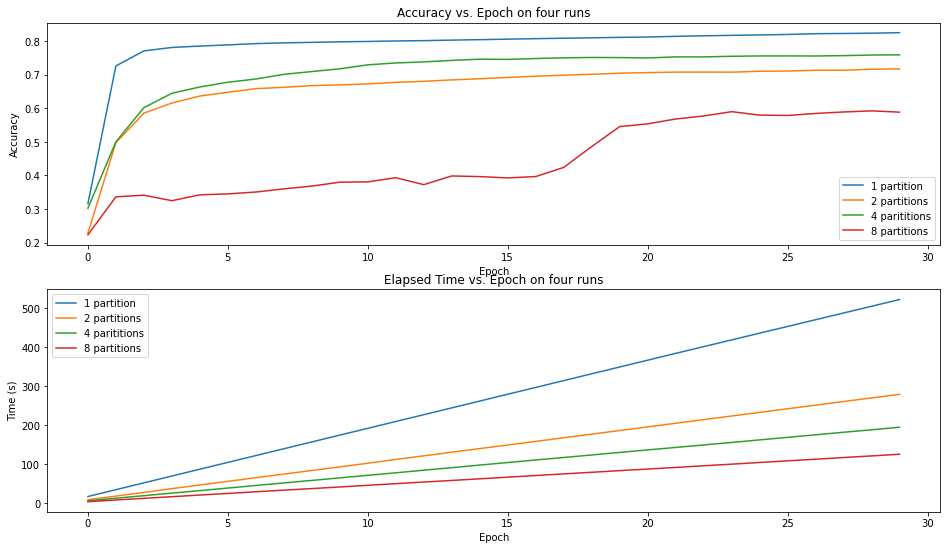

In [47]:
fig, ax = plt.subplots(2,1, figsize = (16,9))
for i in range(len(accuracies)):
    ax[0].plot(np.arange(30), accuracies[i], label = labels[i])
    ax[1].plot(np.arange(30), times[i], label = labels[i])
ax[0].set_title('Accuracy vs. Epoch on four runs')
ax[1].set_title('Elapsed Time vs. Epoch on four runs')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('Time (s)')
ax[0].legend(loc = 'lower right')
ax[1].legend(loc = 'upper left')
plt.show()


There is a sequential portion of the code (calculating accuracies), though it is a very small portion of the code, also when completing an epoch the partitions must communicate with each other.  Therefore, the Gustafson-Barsis law is most appropriate.  Although we do see quite a bit of speedup (30 epochs on 8 partitions takes 120 seconds while it takes 190 seconds on 4, 280 on 2, and 522 seconds on 1 partitition), this fits our expectation of the Gustafson-Barsis law.

However, we do note that doing these calculations on several partitions (even with batch size 32 consistent throughout, there will be samples that are not taken/smaller batches every time we move through, we note that the accuracy decreases as we are not using the entire training set ideally.  It also becomes less linear in training rate.  We note that one partition fit its maximum (under the given model) quite quickly while the rest both plateaud later (by number of epochs, not time taken), and the 'bumpiness' of eight partitions should be noted as an issue of partitions doing seperate calculations.  There very well could be more accuracy if more than 30 epochs were completed with 8 partitions, while the other runs seem to have 

Overall, there is a balance between accuracy and time taken that needs to be taken into account when training these models in parallel.